In [1]:
library('igraph')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [7]:
network <- read.graph("facebook_combined.txt/facebook_combined.txt", format="edgelist", directed=FALSE)

In [8]:
ids <- c(1, 108, 349, 484, 1087)

In [24]:
pnetworks <- make_ego_graph(network, 1, nodes=V(network)[ids])

In [25]:
for(i in c(1, 2, 3, 4, 5)){
    pnetworks[i] = connect(pnetworks[i], 1)
}

ERROR: Error in connect(pnetworks[i], 1): Not a graph object


In [39]:
print(vertex_attr(network))

list()


In [37]:
for (id in V(network)){
    print(id)
    print(vertex_attr(network, index= V(network)))
}

[1] 1
list()
[1] 2
list()
[1] 3
list()
[1] 4
list()
[1] 5
list()
[1] 6
list()
[1] 7
list()
[1] 8
list()
[1] 9
list()
[1] 10
list()
[1] 11
list()
[1] 12
list()
[1] 13
list()
[1] 14
list()
[1] 15
list()
[1] 16
list()
[1] 17
list()
[1] 18
list()
[1] 19
list()
[1] 20
list()
[1] 21
list()
[1] 22
list()
[1] 23
list()
[1] 24
list()
[1] 25
list()
[1] 26
list()
[1] 27
list()
[1] 28
list()
[1] 29
list()
[1] 30
list()
[1] 31
list()
[1] 32
list()
[1] 33
list()
[1] 34
list()
[1] 35
list()
[1] 36
list()
[1] 37
list()
[1] 38
list()
[1] 39
list()
[1] 40
list()
[1] 41
list()
[1] 42
list()
[1] 43
list()
[1] 44
list()
[1] 45
list()
[1] 46
list()
[1] 47
list()
[1] 48
list()
[1] 49
list()
[1] 50
list()
[1] 51
list()
[1] 52
list()
[1] 53
list()
[1] 54
list()
[1] 55
list()
[1] 56
list()
[1] 57
list()
[1] 58
list()
[1] 59
list()
[1] 60
list()
[1] 61
list()
[1] 62
list()
[1] 63
list()
[1] 64
list()
[1] 65
list()
[1] 66
list()
[1] 67
list()
[1] 68
list()
[1] 69
list()
[1] 70
list()
[1] 71
list()
[1] 72
list()
[

In [32]:
intersection(neighbors(network, 1), neighbors(network, 10))

+ 56/4039 vertices, from 38d4392:
 [1]   4  22  26  27  31  57  67  68  70  73  76  80  86 106 114 120 123 129 134
[20] 135 142 143 149 157 162 170 171 177 186 187 189 200 201 204 225 232 233 253
[39] 259 272 273 277 278 281 286 292 296 298 305 316 323 324 330 335 342 343

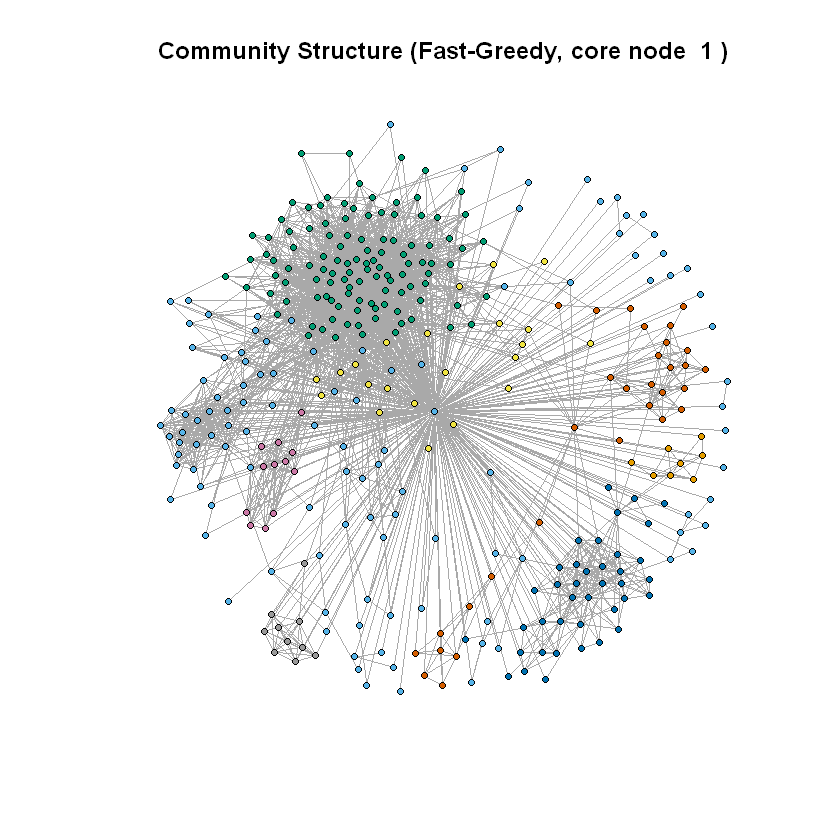

In [13]:
i = 1
fc <- fastgreedy.community(pnetworks[[i]])
#fc <- cluster_fast_greedy(pnetworks[[i]])
#cat("  ", "fast_greedy:", modularity(fc), "\n")
# plot community structure
fc_node_color <- fc$membership + 1
plot(pnetworks[[i]], edge.arrow.size=.5, 
     vertex.color=fc_node_color, vertex.size=2.5, vertex.label="", 
main=paste("Community Structure (Fast-Greedy, core node ",ids[i],")",collapse=""))

#dispersion
mutual_friends <- function(graph, target, core) {
    neighbors_of_core_node <- neighbors(graph, core)
    neighbors_of_target <- neighbors(graph, target)
    
    #return(intersectiontarget_neighbors, core_neighbors)
    return(intersection(neighbors_of_core_node, neighbors_of_target))
}

dispersion <- function(graph, target, core) {
 
    AllLabels <- V(graph)$label
    target_label <- V(graph)[target]$label
    core_label <- V(graph)[core]$label
    
    labels <- c()
    for (label in AllLabels) {
        if (label != target_label & label != core_label) {
            labels <- c(labels, label)
        }
    }
    
    delete_graph <- delete_vertices(graph, c(core, target))
    V(delete_graph)$label <- sort(labels)
    
    mutual_friend <- mutual_friends(graph, target, core) 
    mutual_labels <- V(graph)[mutual_friend]$label
    vtoids <- c()
    for (id in V(delete_graph)) {
        for (label in mutual_labels) {
            if (V(delete_graph)[id]$label == label) {
                vtoids <- c(vtoids, id)
            }
        }
        
    }
    dist <- distances(delete_graph, v=vtoids, to=vtoids)
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
}

In [28]:
neighbors(pnetworks[1], ids[1])

ERROR: Error in neighbors(pnetworks[1], ids[1]): Not a graph object


In [18]:
typeof(pnetworks[i])

[1] "list"

In [19]:
print(pnetworks[i])

[[1]]
IGRAPH 46a3d04 U--- 348 2866 -- 
+ edges from 46a3d04:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--10  4--10
[11]  1--11  1--12  1--13  1--14  1--15  1--16  1--17  1--18  1--19  1--20
[21] 18--20  1--21  3--21 15--21  1--22 10--22 14--22  1--23  8--23  1--24
[31]  1--25  1--26  4--26 10--26 22--26  1--27  4--27 10--27 14--27 22--27
[41] 26--27  1--28  1--29 15--29  1--30 17--30  1--31 10--31  1--32  8--32
[51] 22--32 26--32  1--33  1--34  1--35  1--36  1--37  1--38  1--39  8--39
[61]  1--40 22--40 26--40  1--41 22--41 26--41 27--41 30--41  1--42 15--42
[71] 18--42 20--42 21--42 29--42  1--43 34--43  1--44  1--45 21--45 42--45
[81]  1--46  1--47  1--48  1--49  2--49 31--49  1--50  1--51  1--52 24--52
+ ... omitted several edges



In [40]:
personal_network <- induced_subgraph(network, c(1, neighbors(network, 1)))

In [42]:
print(which(V(personal_network)$label == 1))

integer(0)


In [43]:
########### Devanshi ######

In [44]:
personal_network = induced_subgraph(network, c(1, neighbors(network, 1)))
pn_nodes <- c(1, neighbors(network, 1))
personal_network$label = sort(pn_nodes)

In [49]:
length(pn_nodes)

[1] 348

In [96]:
i = 1
dispersion = rep(0, length(pn_nodes) - 1)

In [50]:
for(v in personal_network$label){
    print(v)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [51]:
personal_network$label[1]

[1] 1

In [52]:
mutual_friends = intersection(neighbors(personal_network, 1), neighbors(personal_network, 2))

In [53]:
mutual_friends[1]

+ 1/348 vertex, from b2ffdf6:
[1] 49

In [54]:
personal_network$label[mutual_friends[1]]

[1] 49

In [62]:
personal_network$label

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
[253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
[271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
[289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
[307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
[325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
[343] 343 344 345 346 347 348

In [55]:
deleted_graph = delete_vertices(personal_network, c(1, 2))

In [64]:
length(V(deleted_graph))

[1] 346

In [72]:
deleted_graph$label <- deleted_graph$label[!deleted_graph$label %in% c(1, 2)]

In [74]:
length(deleted_graph$label)

[1] 346

In [86]:
print(deleted_graph$label)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

In [75]:
deleted_graph$label[mutual_friends[1]]

[1] 51

In [87]:
mutual_friends[2]

+ 1/348 vertex, from b2ffdf6:
[1] 54

In [89]:
which(deleted_graph$label==mutual_friends[1])

[1] 47

In [85]:
mutual_friends[1]

+ 1/348 vertex, from b2ffdf6:
[1] 49

In [107]:
i <- 1
for(v in personal_network$label){
    if(v == 1)
        next
    
    mutual_friends = intersection(neighbors(personal_network, 1), neighbors(personal_network, v))
    deleted_graph = delete_vertices(personal_network, c(1, v))
    deleted_graph$label <- deleted_graph$label[!deleted_graph$label %in% c(1, v)]
    print(length(deleted_graph$label))
    if(length(mutual_friends > 1)){
        vertices = c()
        for(x in 1:length(mutual_friends)){
            vertices = c(vertices, which(deleted_graph$label == mutual_friends[x]))
        }
        print(vertices)
        dist <- distances(deleted_graph, v = vertices, to = vertices)
        dist[is.infinite(dist)] <- 0
        dispersion[i] <- sum(dist)
    }
        print("Disp")
        print(dispersion[i])
    i <- i + 1
}


[1] 346
 [1]  47  52  53  72  87  91 118 125 132 193 235 279 298 314 321 345
[1] "Disp"
[1] 438
[1] 346
[1]  19 114 115 148 225 311 325 332 342
[1] "Disp"
[1] 82
[1] 346
 [1]   8  24  25  66  71  84 121 141 169 187 199 227 273 279 282 322
[1] "Disp"
[1] 378
[1] 346
[1]  77 151 180 194 217 272 274 305 327
[1] "Disp"
[1] 84
[1] 346
 [1]  86 121 155 157 168 179 186 203 212 234 314 315
[1] "Disp"
[1] 224
[1] 346
[1]  88  94 146 218 318
[1] "Disp"
[1] 22
[1] 346
 [1]  21  30  37  64  86 102 128 135 167 212 245 290 303 307 314 321 338 339 346
[1] "Disp"
[1] 562
[1] 346
[1]  90 109 192 200 244 258 263
[1] "Disp"
[1] 60
[1] 346
 [1]   3  20  24  25  29  55  65  66  68  71  74  78  84 104 112 118 121 127 132
[20] 133 140 141 147 155 160 168 169 175 184 185 187 198 199 202 223 230 231 251
[39] 257 270 271 275 276 279 284 290 294 296 303 314 321 322 328 333 340 341
[1] "Disp"
[1] 5036
[1] 346
[1]  66 141 168 199 276 284 290 322 331
[1] "Disp"
[1] 88
[1] 346
[1] "Disp"
[1] 0
[1] 346
[1] "Disp"
[1]

In [105]:
maxdisp = deleted_graph$label[which(dispersion==max(dispersion, rm.na = TRUE))]
print(maxdisp)

numeric(0)


In [108]:
max(dispersion, rm.na = TRUE)

[1] 9942

In [109]:
dispersion

[1]  438   82  378   84  224   22  562   60 5036   88    0    0 1194  236    0
 [16]   80  174    0  154  248 7142  152  668  234 9006 7122   14  168  254  378
 [31]  818   20    0    0    0   94    0  110  288 3304  832    0    0   20  146
 [46]   12    0  786    0  140   36    0 1632   68  286 9942  296   12  382   60
 [61]    6  924   20   32  182  208 9318   68  104    0    2  730  118    0  200
 [76]    2   36   56  118  748    0 1752   36  240  220   20  188  652   60    0
 [91]   60  474   50  596   24  124    4 3388  188   84  368   20  318 1326  216
[106]   76    2  164 1920   12  188    2 2212    0  500  336   36 1816 7452   18
[121]  206 6340  366   20   10   42  274 1022   34  398   30  378  336  406   72
[136]  720  356    0   58  102 1044 2570  124  246    0  136   22  570  196  138
[151]   34    6    0    0    4  188    4  972  238    0  834   50   48    4  134
[166]    2   34  124 2188 3300   88 2490   34    8  504  206  116  236    0  436
[181]   84    4    0  384  912 2786  244 3424   32   22    2    0   24  366   56
[196]  200  272    0 3250 4912    6   16 4994  640    0   16    2   36    0    0
[211] 1160  366 2572  376    0    0   52   56   12    6   50  156  848 1070   86
[226]  190  280    2   44   78  632  780    0    0   16 2078   36  622 5112    8
[241]    0  768   38    0   24  234    6  602  776   16  196 6582    4  266    0
[256]    0  438  290   60   60 2096    6   32   12  910  308    0  100   24    8
[271] 8416 3422   56  238   84  348 7594   90    0 2556  272    0   22  282 3470
[286]    0    0    8    8  188 2054    0    2    4  114   32  720   96  472   40
[301]    0  436  558 4854    0   56   20  812   72  216   52  906 1986  234 5322
[316]    0   54  142   60  676    2 9102 2228  992 2004  420    6   56 1806  252
[331]  546 2868   54 1100    0    2   70   44 1154   28  140 1542  384   98  300
[346] 1066   38